In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
netflix_data=pd.read_csv("/content/netflix1.csv")

Data Cleaning


In [33]:
# Step 3: Basic info
print("Shape:", netflix_data.shape)
print("\nColumns:", netflix_data.columns)
print("\nMissing values:\n", netflix_data.isnull().sum())
print("\nData types:\n", netflix_data.dtypes)


Shape: (8790, 10)

Columns: Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

Missing values:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Data types:
 show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


In [34]:
df=netflix_data

In [35]:
#Handling  missing values
# Fill missing 'country' with "Unknown"
df['country'] = df['country'].fillna("Unknown")

# Fill missing 'director' with "Unknown"
df['director'] = df['director'].fillna("Unknown")

# Fill missing 'rating' with mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


In [36]:

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Clean 'duration' (extract numeric part)
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

In [37]:
# Feature engineering
df['is_movie'] = df['type'].apply(lambda x: 1 if x == "Movie" else 0)

# Handle outliers
# Keep only realistic release years
df = df[df['release_year'] >= 1920]

# Drop duplicates if any
df = df.drop_duplicates()

In [38]:
# Save cleaned dataset
df.to_csv("netflix_cleaned.csv", index=False)
print("\nCleaned dataset saved as netflix_cleaned.csv")


Cleaned dataset saved as netflix_cleaned.csv


Exploratory Data Analysis (EDA)

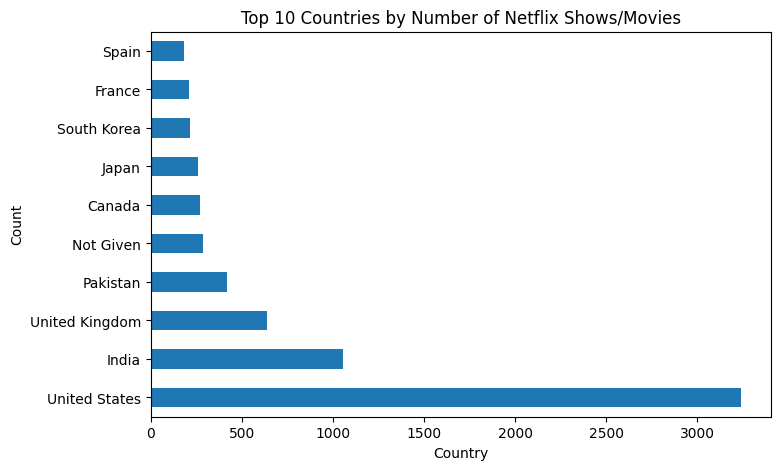

In [39]:
# Top 10 countries by content count
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,5))
country_counts.plot(kind='barh')
plt.title("Top 10 Countries by Number of Netflix Shows/Movies")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


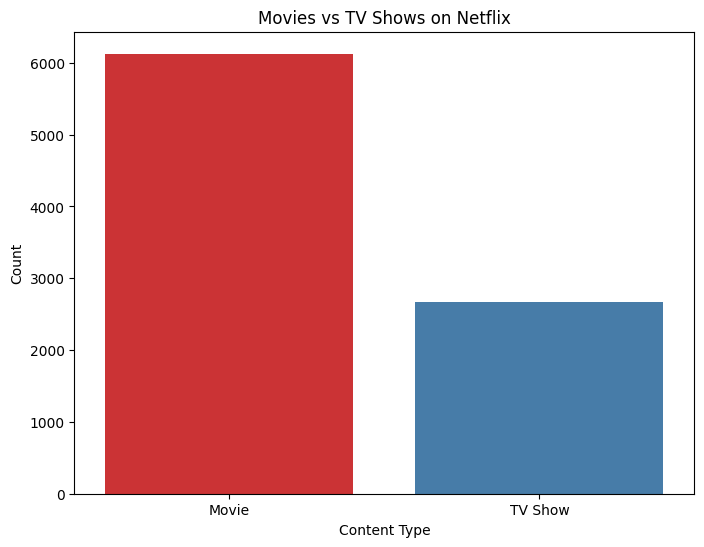

In [40]:
# Movies VS TV shows Distribution
plt.figure(figsize=(8,6))
sns.countplot(x="type", data=df, palette="Set1")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

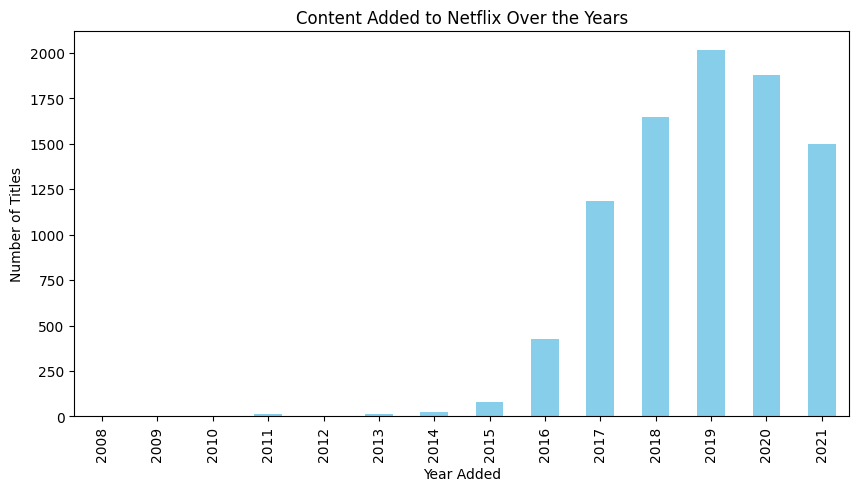

In [41]:
# content added over the years
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color="skyblue")
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

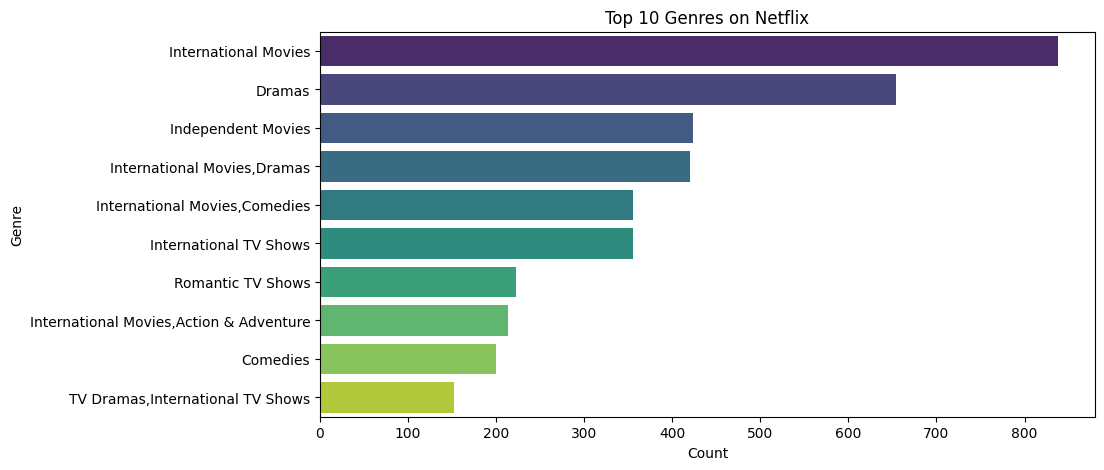

In [42]:
# top 10 genres (from listed_in column)
from collections import Counter

all_genres = ",".join(df['listed_in'].dropna()).split(", ")
genre_counts = Counter(all_genres).most_common(10)
genres, counts = zip(*genre_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(genres), palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


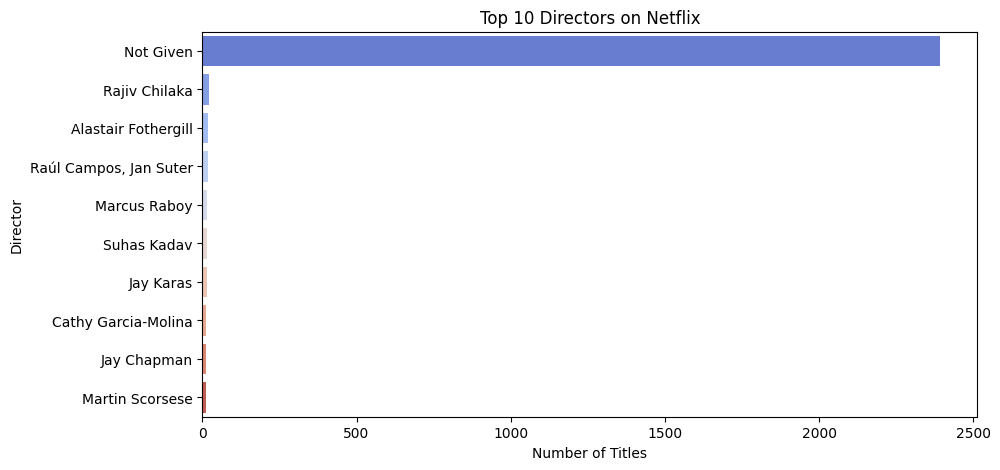

In [13]:
# Top 10 Directors
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


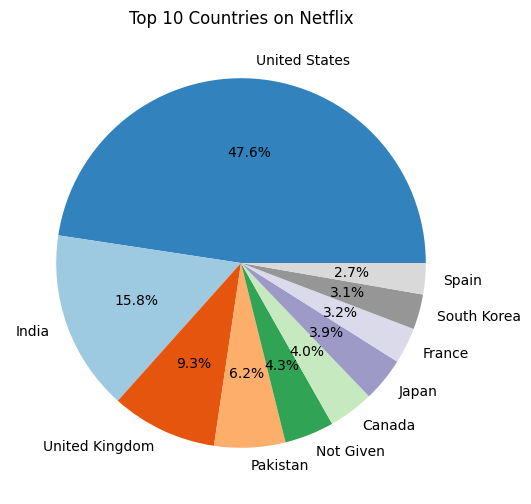

In [14]:
# Content by Country (Top 10 already done, now pie chart)
plt.figure(figsize=(6,6))
df['country'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', cmap="tab20c")
plt.title("Top 10 Countries on Netflix")
plt.ylabel("")
plt.show()

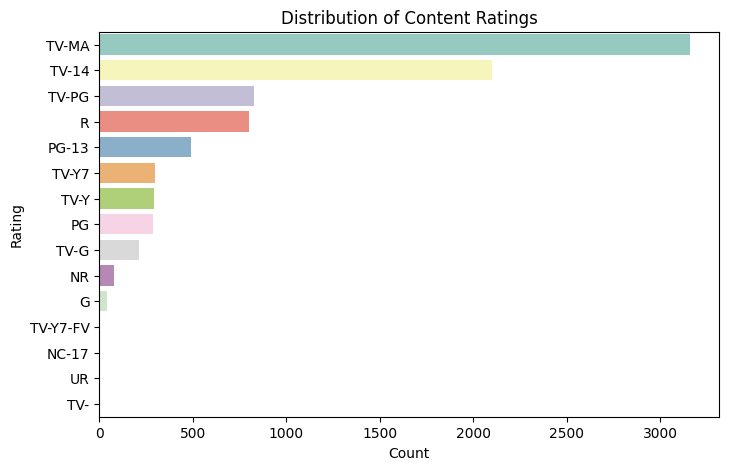

In [15]:
# Content Rating distribution
plt.figure(figsize=(8,5))
sns.countplot(y="rating", data=df, order=df['rating'].value_counts().index, palette="Set3")
plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

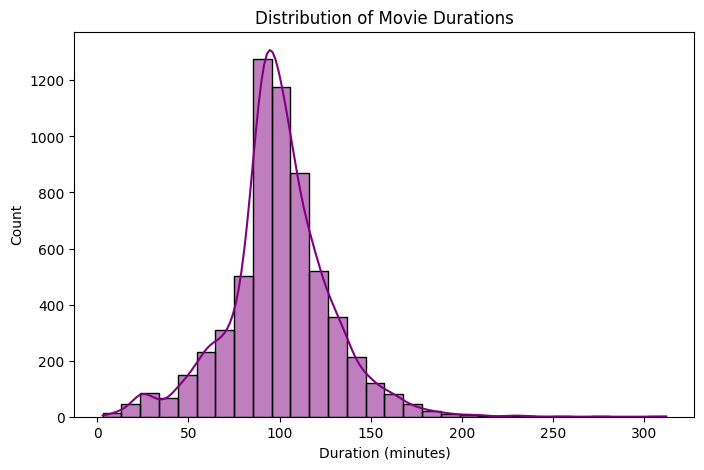

In [16]:
# Duration analysis (Movies only)
movies = df[df['type']=="Movie"]
plt.figure(figsize=(8,5))
sns.histplot(movies['duration_num'], bins=30, kde=True, color="purple")
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

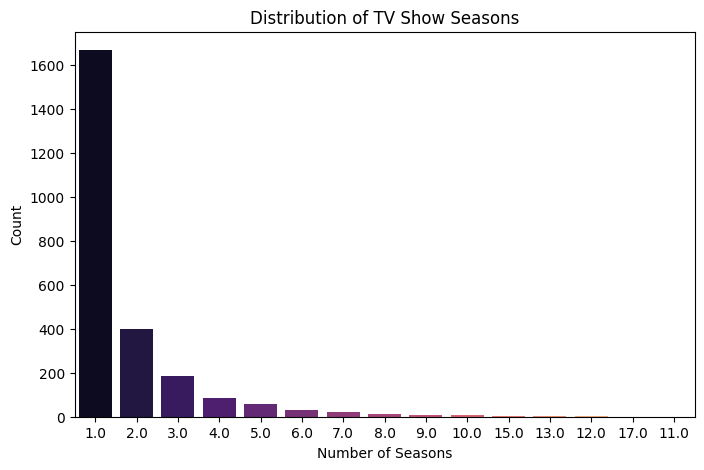

In [17]:
# TV Shows: Number of Seasons
tvshows = df[df['type']=="TV Show"]
plt.figure(figsize=(8,5))
sns.countplot(x="duration_num", data=tvshows, order=tvshows['duration_num'].value_counts().index, palette="magma")
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

Time Based EDA

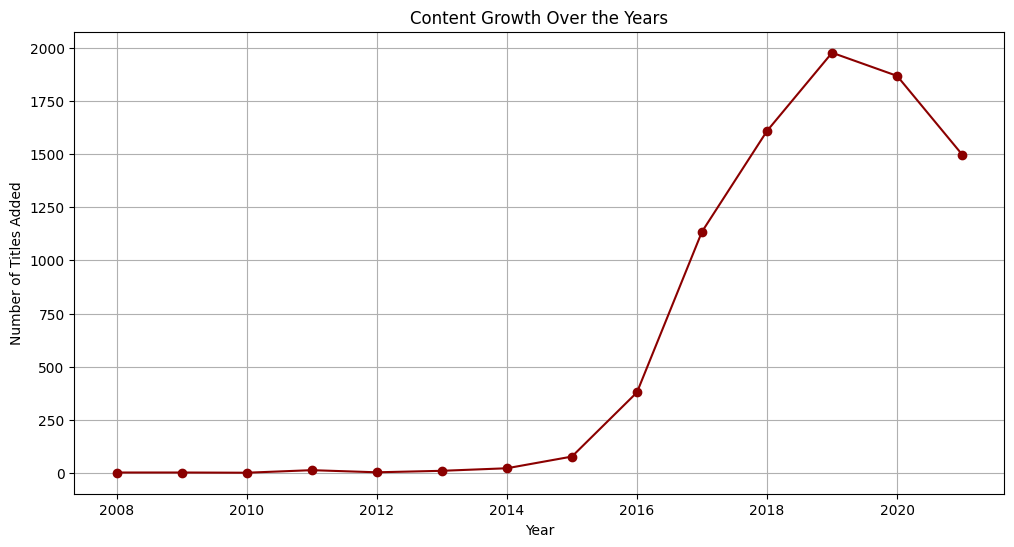

In [18]:

# Content added per year (trend line)
plt.figure(figsize=(12,6))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='darkred')
plt.title("Content Growth Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()


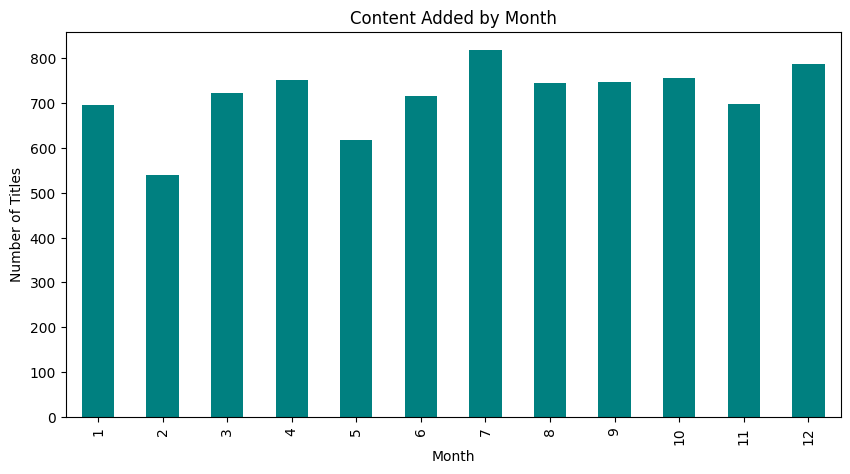

In [19]:
#  Content added per month (across all years)
plt.figure(figsize=(10,5))
df['month_added'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title("Content Added by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()

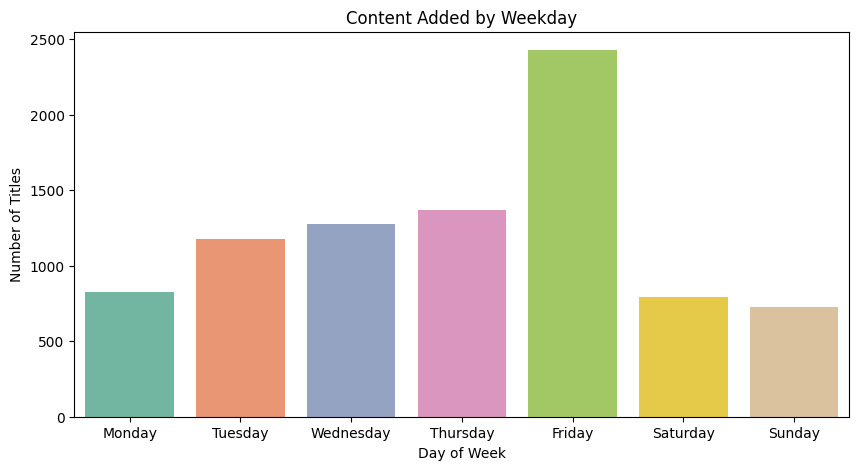

In [20]:
#  Content added by weekday
df['weekday_added'] = df['date_added'].dt.day_name()
plt.figure(figsize=(10,5))
sns.countplot(x="weekday_added", data=df,
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
              palette="Set2")
plt.title("Content Added by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Number of Titles")
plt.show()

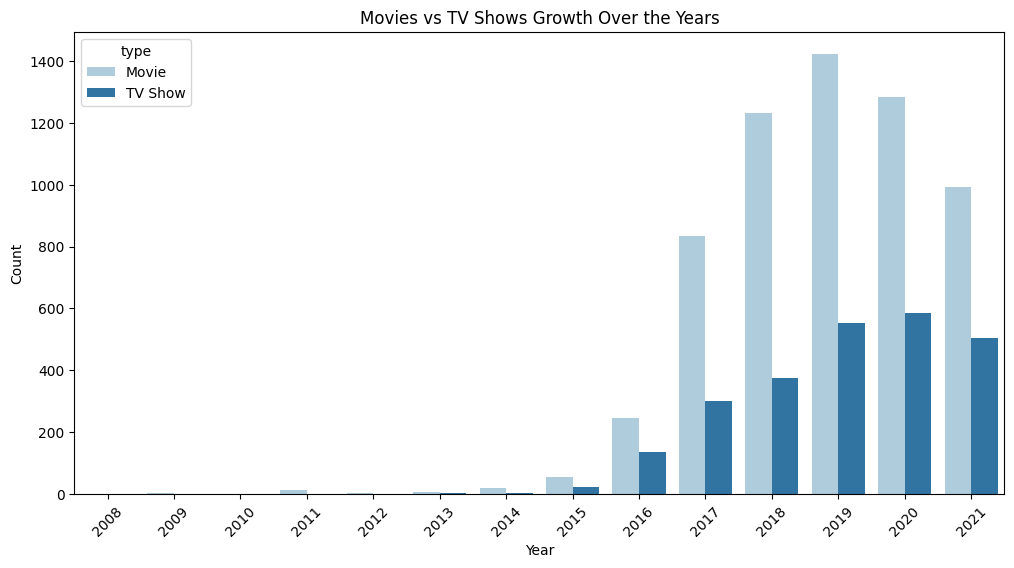

In [21]:
# Movies vs TV Shows over the years
plt.figure(figsize=(12,6))
sns.countplot(x="year_added", hue="type", data=df, palette="Paired")
plt.title("Movies vs TV Shows Growth Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

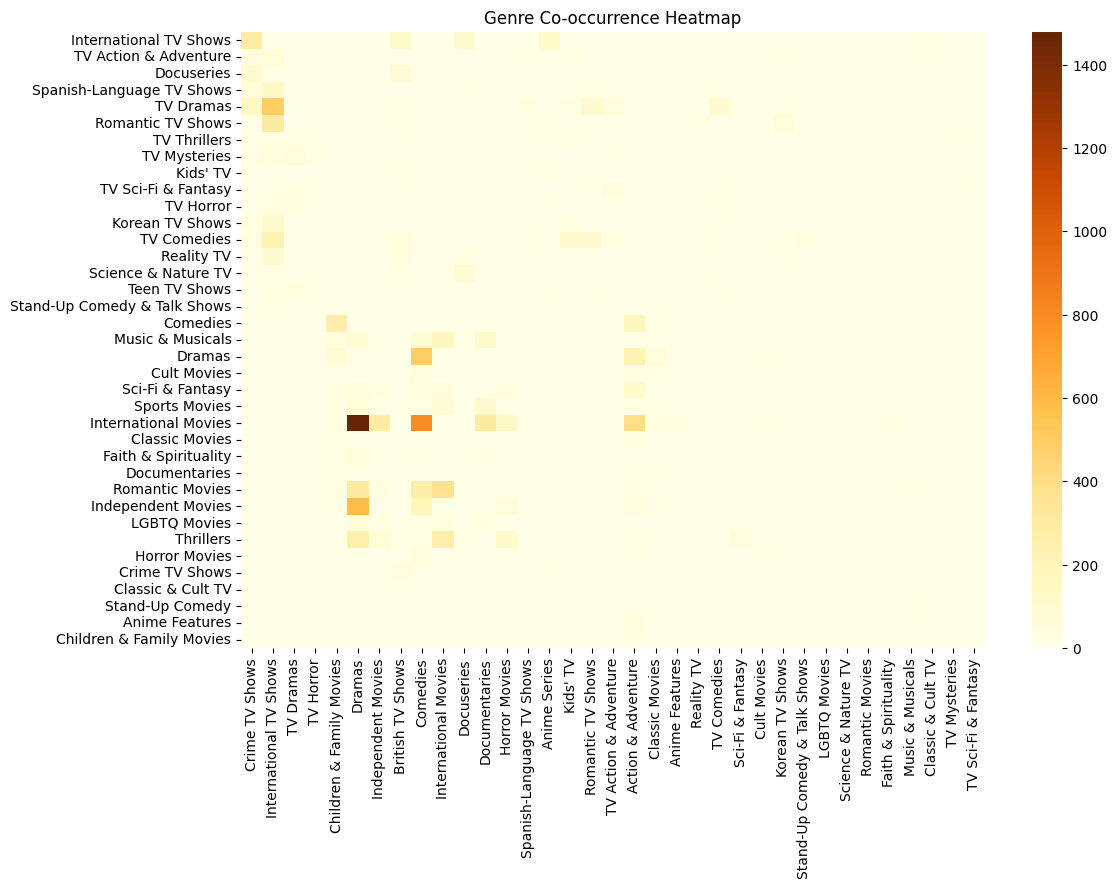

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Genre Co-occurrence Heatmap
genre_lists = df['listed_in'].dropna().str.split(', ')
pairs = []
for g in genre_lists:
    pairs += list(combinations(sorted(set(g)), 2))

pair_counts = Counter(pairs)

heatmap_data = {}
for (g1, g2), c in pair_counts.items():
    if g1 not in heatmap_data:
        heatmap_data[g1] = {}
    heatmap_data[g1][g2] = c

heatmap_df = pd.DataFrame(heatmap_data).fillna(0)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_df, cmap="YlOrBr")
plt.title("Genre Co-occurrence Heatmap")
plt.show()






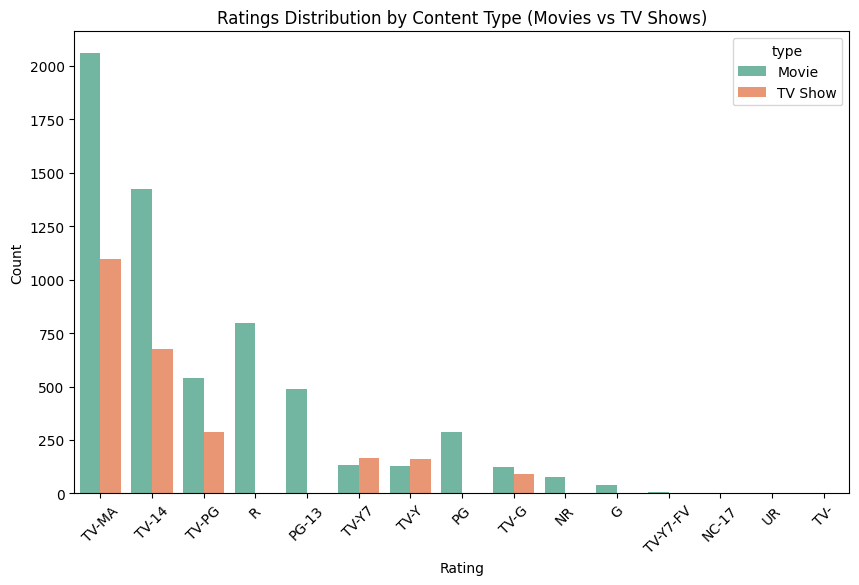

In [23]:
# Ratings vs Content Type
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="rating", hue="type", order=df['rating'].value_counts().index, palette="Set2")
plt.title("Ratings Distribution by Content Type (Movies vs TV Shows)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


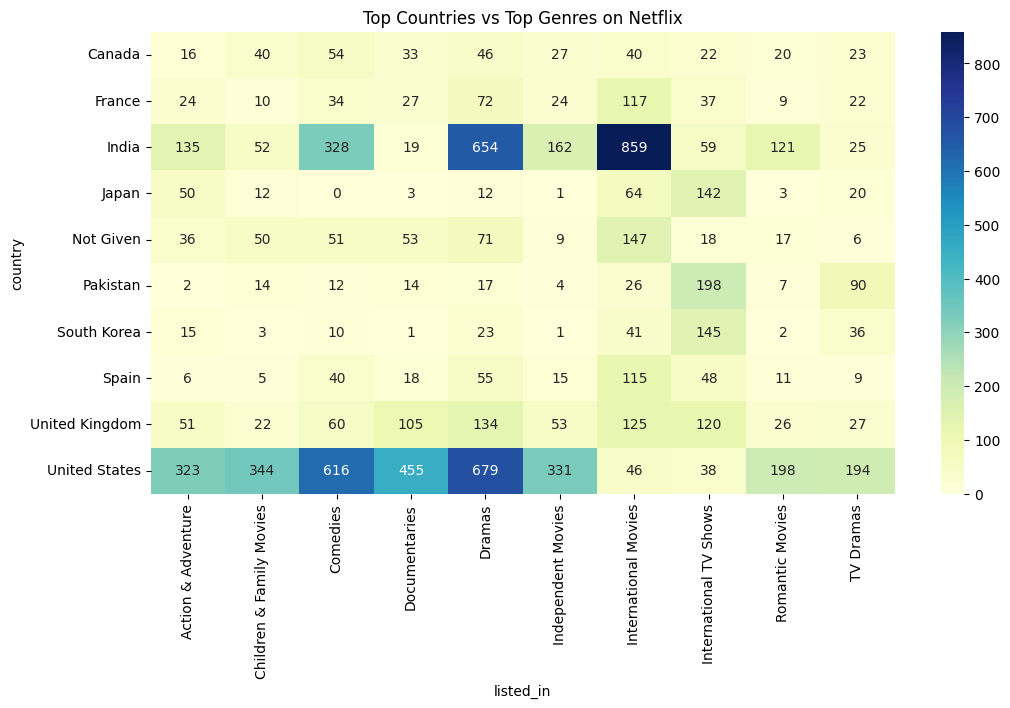

In [24]:
#  Country vs Genre Heatmap
df_exploded = df[['country','listed_in']].dropna()
df_exploded = df_exploded.assign(listed_in=df_exploded['listed_in'].str.split(','))
df_exploded = df_exploded.explode('listed_in')
df_exploded['listed_in'] = df_exploded['listed_in'].str.strip()

# Top 10 countries & genres
top_countries = df_exploded['country'].value_counts().head(10).index
top_genres = df_exploded['listed_in'].value_counts().head(10).index

heatmap_data = df_exploded[df_exploded['country'].isin(top_countries)]
heatmap_data = heatmap_data[heatmap_data['listed_in'].isin(top_genres)]
heatmap_pivot = heatmap_data.pivot_table(index='country', columns='listed_in', aggfunc='size', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Top Countries vs Top Genres on Netflix")
plt.show()


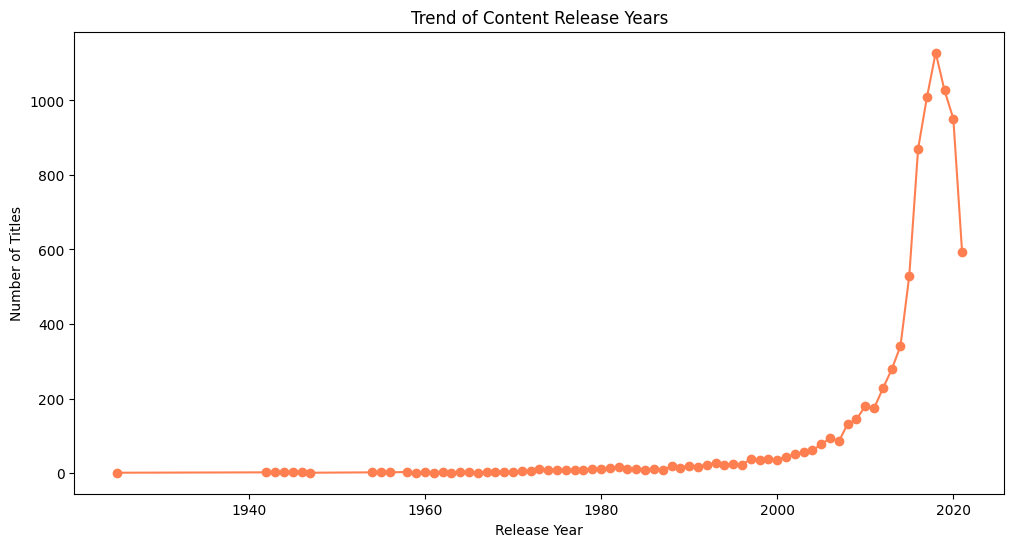

In [25]:
# Release Year Trend
plt.figure(figsize=(12,6))
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color="coral")
plt.title("Trend of Content Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset
ml_df = df.copy()

# Encode categorical columns
le_type = LabelEncoder()
ml_df['type_encoded'] = le_type.fit_transform(ml_df['type'])  # 0=Movie, 1=TV Show

le_rating = LabelEncoder()
ml_df['rating_encoded'] = le_rating.fit_transform(ml_df['rating'])

# Encode genre (use only first genre for simplicity)
ml_df['main_genre'] = ml_df['listed_in'].str.split(',').str[0]
le_genre = LabelEncoder()
ml_df['genre_encoded'] = le_genre.fit_transform(ml_df['main_genre'])


In [27]:
features = ['release_year', 'duration_num', 'rating_encoded', 'genre_encoded']
target = 'type_encoded'

X = ml_df[features].fillna(0)
y = ml_df[target]


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9965116279069768

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1231
           1       0.99      1.00      0.99       489

    accuracy                           1.00      1720
   macro avg       0.99      1.00      1.00      1720
weighted avg       1.00      1.00      1.00      1720



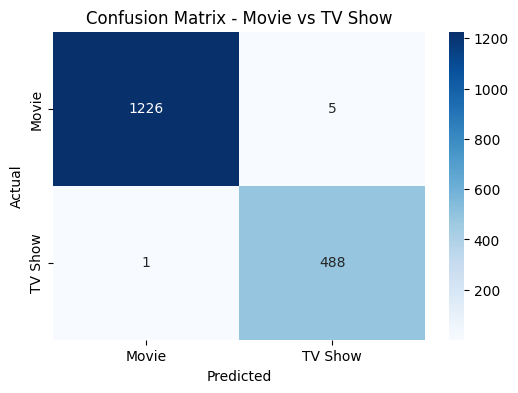

In [29]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=le_type.classes_, yticklabels=le_type.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Movie vs TV Show")
plt.show()



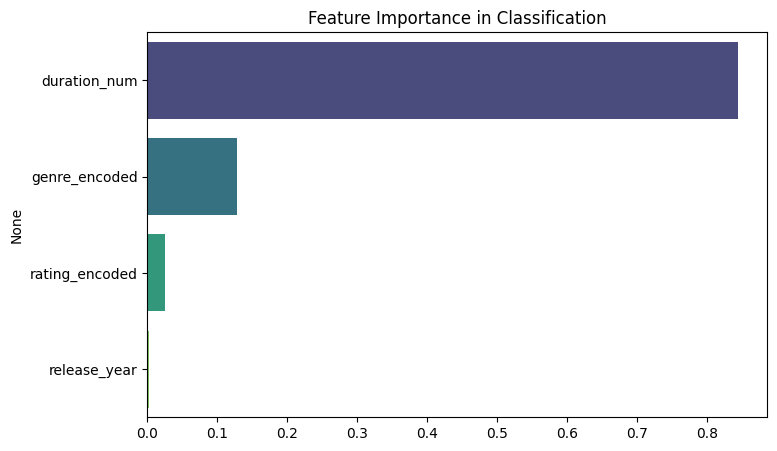

In [30]:
# Feature Importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Feature Importance in Classification")
plt.show()
